In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#import keras
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../Data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data_dictionary.txt
macro.csv
macro.xlsx
sample_submission.csv
test.csv
train.csv
train.xlsx



In [44]:
macro = pd.read_csv('../Data/macro.csv')
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [45]:
macro.shape, train.shape, test.shape

((2484, 100), (30471, 292), (7662, 291))

In [46]:
print('macro=',macro.timestamp.min(),macro.timestamp.max())
print('train=',train.timestamp.min(),train.timestamp.max())
print('test =',test.timestamp.min(),test.timestamp.max())

('macro=', '2010-01-01', '2016-10-19')
('train=', '2011-08-20', '2015-06-30')
('test =', '2015-07-01', '2016-05-30')


In [12]:
corr = macro.corr()
corr[abs(corr)>0.5]

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
oil_urals,1.000000,NaN,0.723601,-0.730893,-0.567825,-0.831245,0.756507,NaN,-0.896539,-0.870997,...,-0.938380,NaN,0.737900,NaN,0.810437,-0.828357,NaN,NaN,NaN,-0.582655
gdp_quart,NaN,1.000000,-0.730279,0.831981,0.870779,0.854641,NaN,NaN,0.711289,0.730896,...,-0.830439,0.919949,0.914008,0.654632,0.899688,0.827409,0.791715,0.777215,0.851396,NaN
gdp_quart_growth,0.723601,-0.730279,1.000000,-0.900038,-0.866393,-0.850159,NaN,NaN,-0.838880,-0.836105,...,NaN,-0.797920,-0.624391,NaN,-0.622531,-0.885556,-0.890549,-0.826483,-0.669109,NaN
cpi,-0.730893,0.831981,-0.900038,1.000000,0.966001,0.954043,-0.541112,NaN,0.918335,0.916164,...,-0.931070,0.918267,0.961128,0.622652,0.952960,0.969202,0.937238,0.902425,0.853122,NaN
ppi,-0.567825,0.870779,-0.866393,0.966001,1.000000,0.936734,NaN,NaN,0.822143,0.820750,...,-0.911639,0.926775,0.930183,0.740442,0.939415,0.928301,0.847339,0.758269,0.851333,NaN
gdp_deflator,-0.831245,0.854641,-0.850159,0.954043,0.936734,1.000000,-0.624249,NaN,0.861502,0.854419,...,NaN,0.988902,0.999996,NaN,0.952380,0.942390,0.924476,0.939339,0.936640,NaN
balance_trade,0.756507,NaN,NaN,-0.541112,NaN,-0.624249,1.000000,NaN,-0.663685,-0.641430,...,-0.654460,NaN,NaN,NaN,0.528931,NaN,NaN,NaN,NaN,NaN
balance_trade_growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,-0.733588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usdrub,-0.896539,0.711289,-0.838880,0.918335,0.822143,0.861502,-0.663685,NaN,1.000000,0.990832,...,NaN,0.685330,NaN,NaN,NaN,0.868944,0.611508,0.546962,NaN,0.577564
eurrub,-0.870997,0.730896,-0.836105,0.916164,0.820750,0.854419,-0.641430,NaN,0.990832,1.000000,...,NaN,0.699566,NaN,NaN,NaN,0.875554,0.655819,NaN,NaN,0.506566


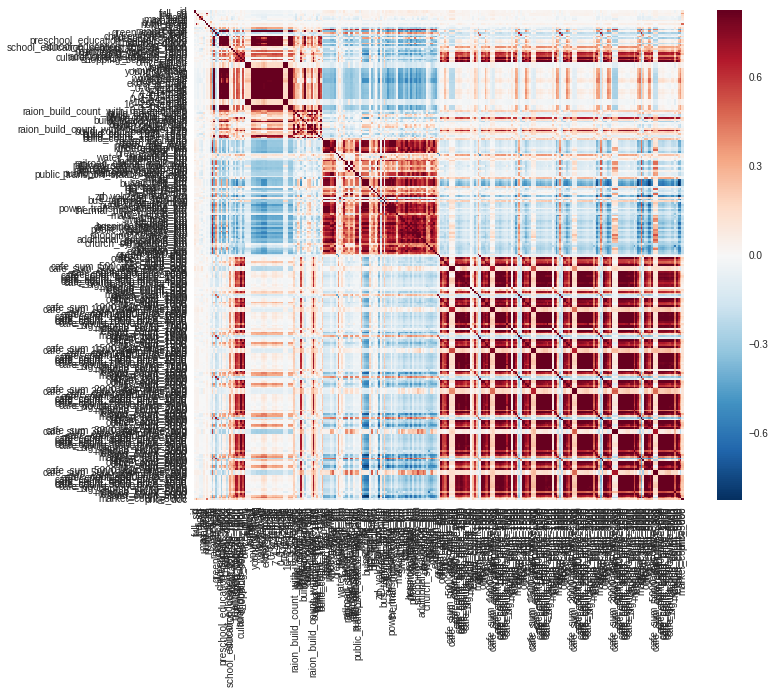

In [47]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True); f

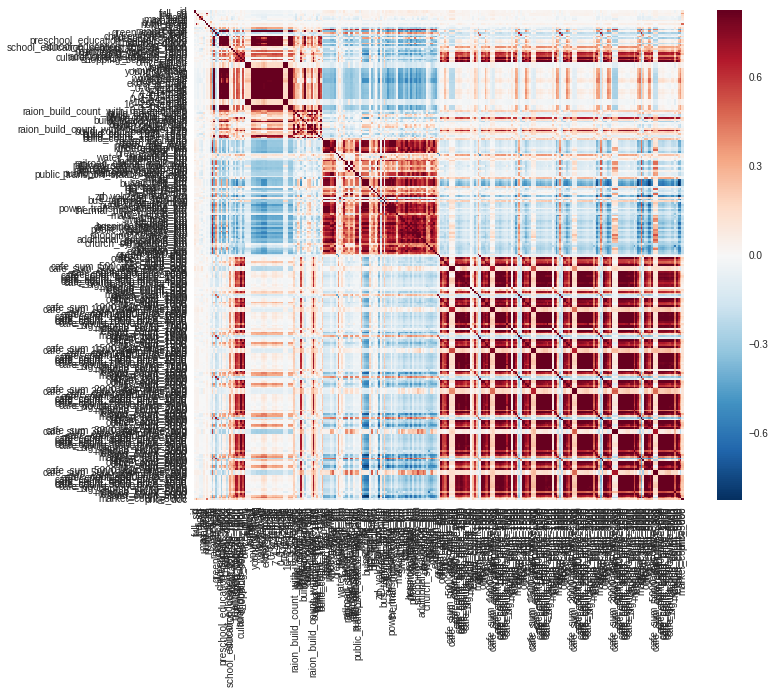

In [48]:
corr = train.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True); f

In [81]:
## HW (Holt-Winters) exponent smoothing (1 - trend, 2 - (trend+level), 3 - (trend+level+season))
def exp1_smooth ( series, alpha) :
    result = [series[0]]
    for i in range(1,len(series)) :
        result.append(alpha*series[i]+(1.0-alpha)*result[-1])
    return(result)

def exp2_smooth ( series, alpha, beta) :
    level, trend = series[0], series[1]-series[0]
    result = [series[0],level+trend]
    for i in range(2,len(series)) :
        last_level, last_trend = level, trend
        level = alpha*series[i]+(1-alpha)*(last_level+last_trend)
        trend = beta * (level-last_level) + (1-beta) * last_trend;
        result.append(level+trend)
    return(result)

def exp3_smooth ( series, alpha, beta, gamma, l) :
    
    return(result)

class HoltWinters:

    """
    Взято из : https://habrahabr.ru/company/ods/blog/327242/
    
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

In [82]:
%%time
alpha = 0.2
beta  = 0.5
es1 = exp1_smooth(train['price_doc'],alpha)
es2 = exp2_smooth(train['price_doc'],alpha,beta)

CPU times: user 660 ms, sys: 56 ms, total: 716 ms
Wall time: 595 ms


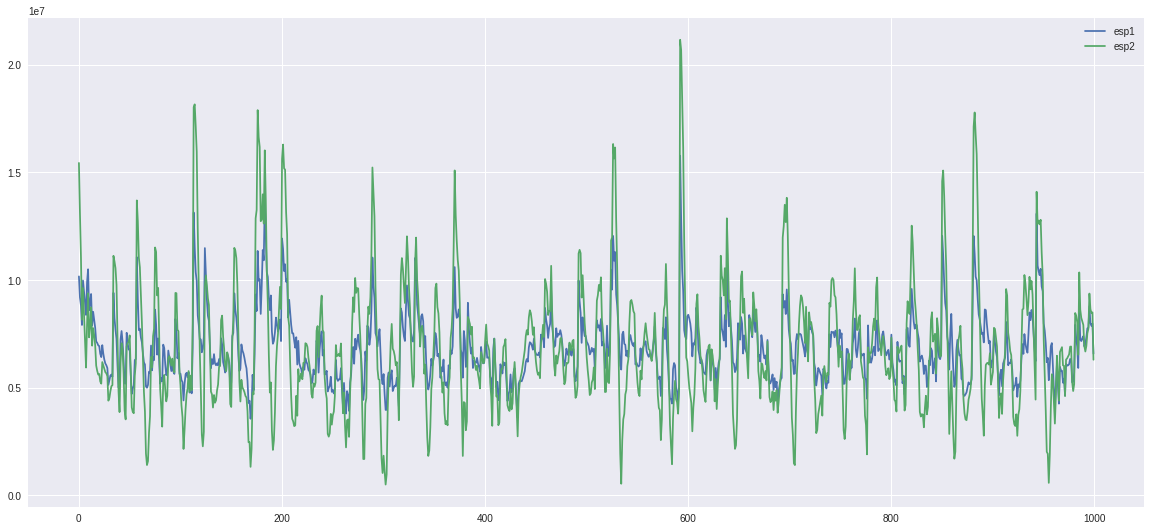

In [79]:
#plt.clear()
f = plt.figure(figsize=(20, 9)); legenda = [];
#plt.plot(train['price_doc'][1000:2000].tolist()); legenda = ['price']
plt.plot(es1[1000:2000]); legenda = legenda + ['esp1']
plt.plot(es2[1000:2000]); legenda = legenda + ['esp2']

plt.legend(legenda)

plt.show()

In [86]:
import xgboost as xgb